In [1]:
import pandas as pd 

Reading CleanedDataset from cleaning_dataset_1.ipynb

In [4]:
df_raw = pd.read_csv("CleanedDataset.csv")
df_raw.head(3)

,Age,Industry_grouped,JobTitle_grouped,Salary,AdditionalComp,Country_cleaned,ExperienceOverall,ExperienceField,Education,Gender,Race
0,25-34,Education,Education & Training,55000.0,0.0,United States,5-7 years,5-7 years,Master's degree,Woman,White
1,25-34,Tech,Management,68250.0,5000.0,United Kingdom,8 - 10 years,5-7 years,College degree,Non-binary,White
2,25-34,Finance,Marketing & Communications,34000.0,NaN,United States,2 - 4 years,2 - 4 years,College degree,Woman,White


Exploratory Data Analysis

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

General Information

In [7]:
print(df_raw.shape)
print(df_raw.info())
print(df_raw.describe(include='all'))

(28046, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28046 entries, 0 to 28045
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                28046 non-null  object 
 1   Industry_grouped   28046 non-null  object 
 2   JobTitle_grouped   28046 non-null  object 
 3   Salary             28046 non-null  float64
 4   AdditionalComp     20743 non-null  float64
 5   Country_cleaned    28046 non-null  object 
 6   ExperienceOverall  28046 non-null  object 
 7   ExperienceField    28046 non-null  object 
 8   Education          27824 non-null  object 
 9   Gender             27875 non-null  object 
 10  Race               27866 non-null  object 
dtypes: float64(2), object(9)
memory usage: 2.4+ MB
None
          Age Industry_grouped JobTitle_grouped        Salary  AdditionalComp  \
count   28046            28046            28046  2.804600e+04    2.074300e+04   
unique      7               17      

Missing Values

In [8]:
missing = df_raw.isnull().sum()
missing_percent = df_raw.isnull().mean() * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_percent})
print(missing_df[missing_df['Missing Count'] > 0])


                Missing Count  Missing %
AdditionalComp           7303  26.039364
Education                 222   0.791557
Gender                    171   0.609713
Race                      180   0.641803


Univariate Analysis

c:\Users\natha\Downloads\Computational_Physics\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


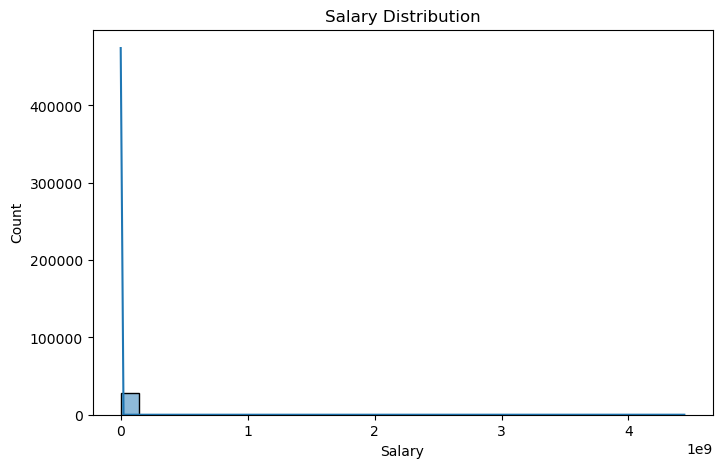

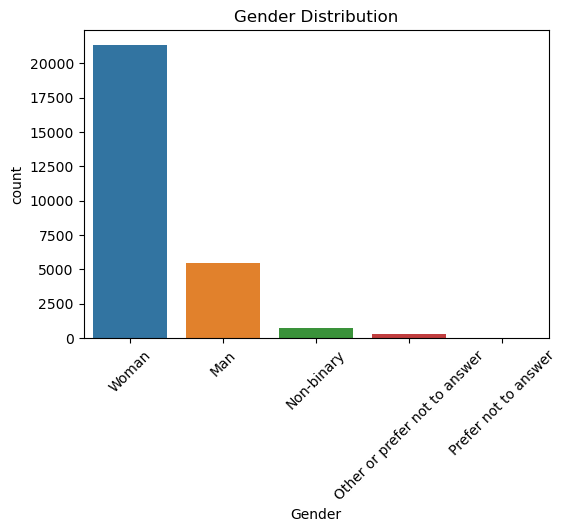

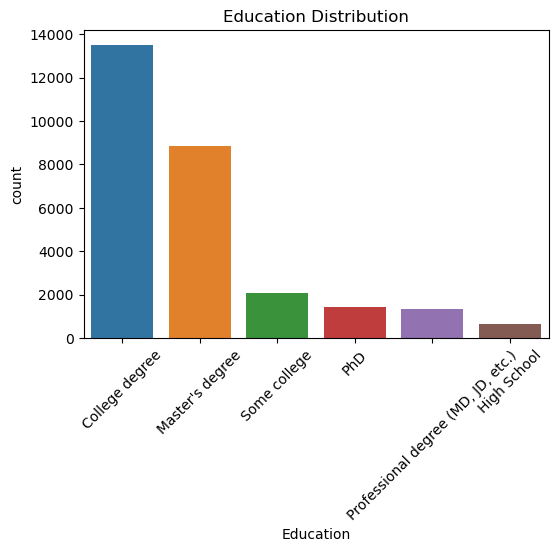

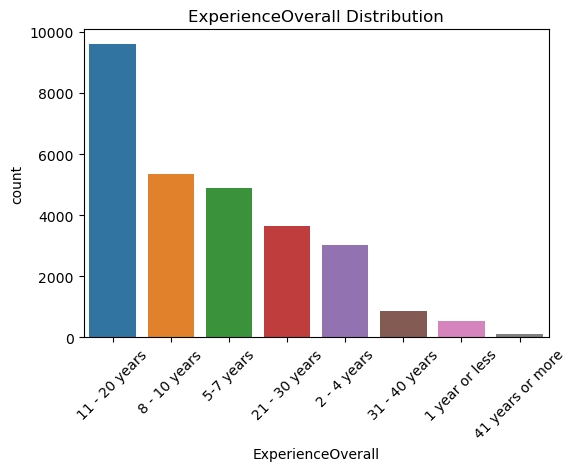

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(df_raw['Salary'], kde=True, bins=30)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.show()

for col in ['Gender', 'Education', 'ExperienceOverall']:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_raw, x=col, order=df_raw[col].value_counts().index)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
    plt.show()


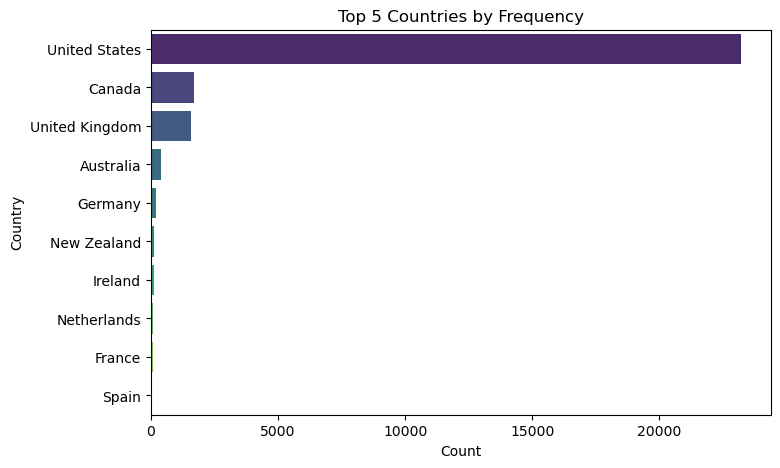

In [22]:
top_countries = df_raw['Country_cleaned'].value_counts().nlargest(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 5 Countries by Frequency')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

Bivariate Analysis

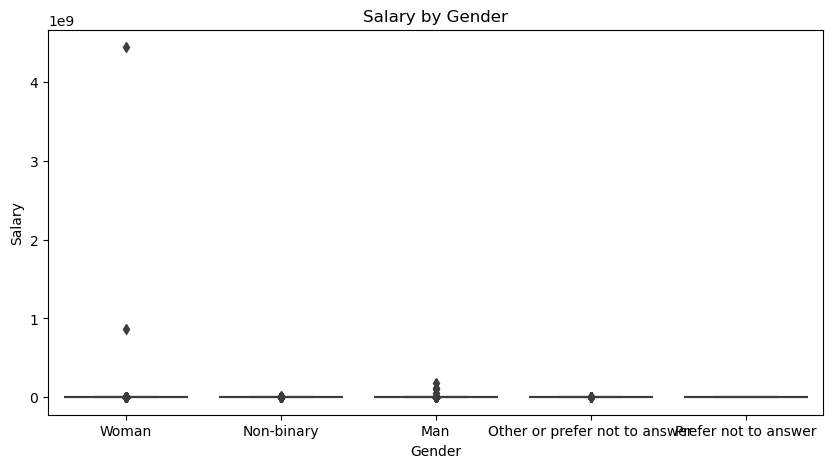

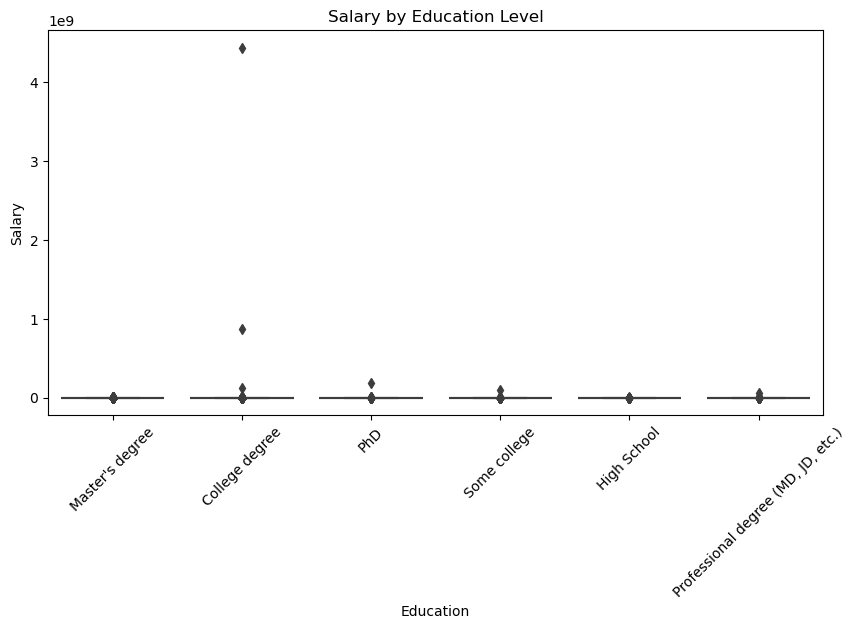

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_raw, x='Gender', y='Salary')
plt.title('Salary by Gender')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_raw, x='Education', y='Salary')
plt.title('Salary by Education Level')
plt.xticks(rotation=45)
plt.show()



In [19]:
grouped = df_raw.groupby('Industry_grouped')['Salary'].agg(['count', 'mean', 'median']).sort_values('mean', ascending=False)
print(grouped.head(10))


                             count          mean   median
Industry_grouped                                         
Finance                       2351  1.980807e+06  76250.0
Education                     3764  3.467874e+05  60000.0
Other                          944  2.166891e+05  61205.0
Healthcare                    2099  1.176630e+05  77500.0
Legal                         1097  1.169201e+05  91000.0
Tech                          9390  1.139394e+05  85000.0
Consulting                     891  1.127729e+05  87500.0
Engineering & Manufacturing   1768  9.528474e+04  86000.0
Media & Entertainment          337  8.854354e+04  65000.0
Marketing                     1426  8.846618e+04  72000.0


Checking Imbalance Data : Detected Country Data Imbalance

In [ ]:
df_raw["Country_cleaned"].value_counts()

Country_cleaned
United States     23222
Canada             1688
United Kingdom     1594
Australia           391
Germany             198
                  ...  
Sierra Leone          1
Costa Rica            1
Qatar                 1
Congo                 1
Egypt                 1
Name: count, Length: 89, dtype: int64

Implementing Downsample

In [ ]:
from sklearn.utils import resample
df = df_raw.copy()
df_us = df[df['Country_cleaned'] == 'United States']
df_non_us = df[df['Country_cleaned'] != 'United States']

df_us_downsampled = resample(df_us, replace=False, n_samples=1700, random_state=42)

df_balanced = pd.concat([df_us_downsampled, df_non_us])
df_balanced = df_balanced.reset_index(drop=True)

Handling Missing Values with 0 imputation (Numerical) and Mode imputation (Categorical)

In [ ]:
df = df_balanced.copy()

df["AdditionalComp"] = df["AdditionalComp"].fillna(0)
df["Education"] = df["Education"].fillna(df["Education"].mode().iloc[0])
df["Gender"] = df["Gender"].fillna(df["Gender"].mode().iloc[0])
df["Race"] = df["Race"].fillna(df["Race"].mode().iloc[0])

df["TotalComp"] = df["Salary"] + df["AdditionalComp"]

for col in ['Age', 'ExperienceOverall', 'ExperienceField', 'Education']:
    df[col] = df[col].fillna(df[col].mode().iloc[0])


Encoding Categorical Data : Ordinal Encoder

In [8]:
from sklearn.preprocessing import OrdinalEncoder

age_order = ['under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65 or over']
experience_order = [
    '1 year or less', '2 - 4 years', '5-7 years', '8 - 10 years',
    '11 - 20 years', '21 - 30 years', '31 - 40 years', '41 years or more'
]
education_order = [
    'High School', 'Some college', 'College degree', "Master's degree",
    'Professional degree (MD, JD, etc.)', 'PhD'
]

encoder = OrdinalEncoder(categories=[age_order, experience_order, experience_order, education_order])
df[['Age', 'ExperienceOverall', 'ExperienceField', 'Education']] = encoder.fit_transform(
    df[['Age', 'ExperienceOverall', 'ExperienceField', 'Education']]
)


Splitting Training Testing Data

Weighting TotalCompensation - Prepare for Clustering

In [ ]:
from sklearn.model_selection import train_test_split

feature_cols = ['Age', 'ExperienceOverall', 'ExperienceField', 'Education', 'Gender',
                'Country_cleaned', 'Race', 'Industry_grouped', 'JobTitle_grouped', 'TotalComp']

df_model = df[feature_cols].copy()
df_model["TotalComp"] = df_model["TotalComp"]*5
df_train, df_test = train_test_split(df_model, test_size=0.2, random_state=42)


Encoding Categorical Data : TargetEncoder and Mapping

In [ ]:
from category_encoders import TargetEncoder

cols_to_encode = ['Country_cleaned', 'Race', 'Industry_grouped', 'JobTitle_grouped']
encoders = {}  
df_train_enc = df_train.copy()
df_test_enc = df_test.copy()

for col in cols_to_encode:
    encoder = TargetEncoder()
    df_train_enc[col] = encoder.fit_transform(df_train[col], df_train['TotalComp'])
    df_test_enc[col] = encoder.transform(df_test[col])  
    encoders[col] = encoder  

df_train_enc['Gender'] = df_train_enc['Gender'].map({'Man': 0, 'Woman': 1,'Non-binary':2,'Other or prefer not to answer':3}).fillna(2)
df_test_enc['Gender'] = df_test_enc['Gender'].map({'Man': 0, 'Woman': 1,'Non-binary':2,'Other or prefer not to answer':3}).fillna(2)



In [ ]:
col = ['Country_cleaned','Industry_grouped', 'JobTitle_grouped', 'TotalComp',"Gender"]
df_train_enc = df_train_enc[col]
df_test_enc = df_test_enc[col]

Normalization Data using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df_train_enc)
X_test_scaled = scaler.transform(df_test_enc)

Clustering : KMeans
n_cluster = 10 resulting Best Silhouette Score

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Silhouette Score Looping to get best_k

In [ ]:

# inertia_scores = []
# silhouette_scores = []
# k_range = range(2, 21)
# best_k = None
# best_score = -1

# for k in k_range:
#     kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
#     labels = kmeans.fit_predict(X_train_scaled)
    
#     inertia = kmeans.inertia_
#     silhouette = silhouette_score(X_train_scaled, labels)
    
#     inertia_scores.append(inertia)
#     silhouette_scores.append(silhouette)
    
#     if silhouette > best_score:
#         best_score = silhouette
#         best_k = k

In [14]:
mod = KMeans(n_clusters=10, random_state=42, n_init=10)
print(silhouette_score(X_train_scaled, mod.fit_predict(X_train_scaled)))
train_labels = mod.fit_predict(X_train_scaled)

0.7906559451619293


Classifier Models

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier



In [ ]:
cols_to_drop = []
X_train_reduced = df_train_enc.drop(columns=cols_to_drop + ['TotalComp'])
X_test_reduced = df_test_enc.drop(columns=cols_to_drop + ['TotalComp'])

scaler = StandardScaler()
X_train_scaled_reduced = scaler.fit_transform(X_train_reduced)
X_test_scaled_reduced = scaler.transform(X_test_reduced)

models = {
    "Ridge Classifier (L2)": RidgeClassifier(alpha=1.0),  # L2 regularized linear classifier
    "Lasso Logistic Regression": LogisticRegression(
        penalty='l1',
        solver='liblinear',  # required for L1
        C=0.1,               # smaller C = stronger regularization
        max_iter=300,
        random_state=42
    ),
    "MLP (early stop + L2)": MLPClassifier(
        hidden_layer_sizes=(64,), 
        max_iter=300, 
        alpha=0.001,        # L2 penalty
        early_stopping=True,
        random_state=42
    ),
    "Extra Trees (more randomized RF)": ExtraTreesClassifier(n_estimators=50, max_depth=5, random_state=42),
    "XGBoost (reg alpha/lambda)": XGBClassifier(
    n_estimators=50, 
    max_depth=3, 
    learning_rate=0.1, 
    reg_alpha=1,        # L1 regularization
    reg_lambda=1,       # L2 regularization
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
),
    "Naive Bayes": GaussianNB(),
    

    "Random Forest (shallow)": RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=300, C=0.5, random_state=42),
    "KNN ": KNeighborsClassifier(n_neighbors=10),
    "Gradient Boosting (simple)": GradientBoostingClassifier(n_estimators=30, max_depth=2, random_state=42),
    "SVM (default)": SVC(kernel='linear', C=0.5)
}

test_labels = mod.predict(X_test_scaled)

for name, model in models.items():
    model.fit(X_train_scaled_reduced, train_labels)
    test_pred = model.predict(X_test_scaled_reduced)
    
    print(f"🔹 {name}")
    print("Accuracy:", accuracy_score(test_labels, test_pred))
    print(classification_report(test_labels, test_pred))
    print("-" * 50)


🔹 Ridge Classifier (L2)
Accuracy: 0.871264367816092
              precision    recall  f1-score   support

           0       0.99      0.69      0.81       225
           1       0.98      1.00      0.99       108
           2       0.84      1.00      0.91       198
           3       0.84      1.00      0.92       605
           5       0.85      1.00      0.92        71
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00        40
           8       0.00      0.00      0.00        44
           9       0.00      0.00      0.00        13

    accuracy                           0.87      1305
   macro avg       0.50      0.52      0.50      1305
weighted avg       0.82      0.87      0.83      1305

--------------------------------------------------


c:\Users\natha\Downloads\Computational_Physics\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\natha\Downloads\Computational_Physics\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\natha\Downloads\Computational_Physics\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

🔹 Lasso Logistic Regression
Accuracy: 0.9754789272030652
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       225
           1       1.00      1.00      1.00       108
           2       1.00      1.00      1.00       198
           3       0.96      1.00      0.98       605
           5       1.00      0.97      0.99        71
           6       0.00      0.00      0.00         1
           7       0.97      0.97      0.97        40
           8       0.94      0.36      0.52        44
           9       1.00      1.00      1.00        13

    accuracy                           0.98      1305
   macro avg       0.87      0.81      0.83      1305
weighted avg       0.97      0.98      0.97      1305

--------------------------------------------------


c:\Users\natha\Downloads\Computational_Physics\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\natha\Downloads\Computational_Physics\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\natha\Downloads\Computational_Physics\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

🔹 MLP (early stop + L2)
Accuracy: 0.9969348659003832
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       225
           1       1.00      1.00      1.00       108
           2       1.00      1.00      1.00       198
           3       1.00      1.00      1.00       605
           5       0.99      0.99      0.99        71
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00        40
           8       0.98      0.98      0.98        44
           9       1.00      0.92      0.96        13

    accuracy                           1.00      1305
   macro avg       0.88      0.88      0.88      1305
weighted avg       1.00      1.00      1.00      1305

--------------------------------------------------


c:\Users\natha\Downloads\Computational_Physics\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\natha\Downloads\Computational_Physics\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\natha\Downloads\Computational_Physics\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

🔹 Extra Trees (more randomized RF)
Accuracy: 0.7969348659003831
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       225
           1       1.00      1.00      1.00       108
           2       0.84      1.00      0.91       198
           3       0.73      1.00      0.84       605
           5       1.00      1.00      1.00        71
           6       0.00      0.00      0.00         1
           7       0.50      0.03      0.05        40
           8       1.00      1.00      1.00        44
           9       1.00      1.00      1.00        13

    accuracy                           0.80      1305
   macro avg       0.67      0.67      0.64      1305
weighted avg       0.66      0.80      0.71      1305

--------------------------------------------------


c:\Users\natha\Downloads\Computational_Physics\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\natha\Downloads\Computational_Physics\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\natha\Downloads\Computational_Physics\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

🔹 XGBoost (reg alpha/lambda)
Accuracy: 0.9977011494252873
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       225
           1       1.00      0.98      0.99       108
           2       1.00      1.00      1.00       198
           3       1.00      1.00      1.00       605
           5       1.00      1.00      1.00        71
           6       0.00      0.00      0.00         1
           7       0.98      1.00      0.99        40
           8       1.00      1.00      1.00        44
           9       1.00      1.00      1.00        13

    accuracy                           1.00      1305
   macro avg       0.89      0.89      0.89      1305
weighted avg       1.00      1.00      1.00      1305

--------------------------------------------------
🔹 Naive Bayes
Accuracy: 0.9969348659003832
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       225
           1       0.98      1.00 

c:\Users\natha\Downloads\Computational_Physics\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\natha\Downloads\Computational_Physics\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\natha\Downloads\Computational_Physics\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

🔹 Random Forest (shallow)
Accuracy: 0.9992337164750957
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       225
           1       1.00      1.00      1.00       108
           2       1.00      1.00      1.00       198
           3       1.00      1.00      1.00       605
           5       1.00      1.00      1.00        71
           6       0.00      0.00      0.00         1
           7       0.98      1.00      0.99        40
           8       1.00      1.00      1.00        44
           9       1.00      1.00      1.00        13

    accuracy                           1.00      1305
   macro avg       0.89      0.89      0.89      1305
weighted avg       1.00      1.00      1.00      1305

--------------------------------------------------
🔹 Logistic Regression
Accuracy: 0.9992337164750957


c:\Users\natha\Downloads\Computational_Physics\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\natha\Downloads\Computational_Physics\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\natha\Downloads\Computational_Physics\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       225
           1       1.00      1.00      1.00       108
           2       1.00      1.00      1.00       198
           3       1.00      1.00      1.00       605
           5       1.00      0.99      0.99        71
           6       1.00      1.00      1.00         1
           7       0.98      1.00      0.99        40
           8       1.00      1.00      1.00        44
           9       1.00      1.00      1.00        13

    accuracy                           1.00      1305
   macro avg       1.00      1.00      1.00      1305
weighted avg       1.00      1.00      1.00      1305

--------------------------------------------------
🔹 KNN 
Accuracy: 0.9977011494252873
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       225
           1       0.98      1.00      0.99       108
           2       1.00      1.00      1.00  

c:\Users\natha\Downloads\Computational_Physics\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\natha\Downloads\Computational_Physics\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\natha\Downloads\Computational_Physics\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

🔹 Gradient Boosting (simple)
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       225
           1       1.00      1.00      1.00       108
           2       1.00      1.00      1.00       198
           3       1.00      1.00      1.00       605
           5       1.00      1.00      1.00        71
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00        40
           8       1.00      1.00      1.00        44
           9       1.00      1.00      1.00        13

    accuracy                           1.00      1305
   macro avg       1.00      1.00      1.00      1305
weighted avg       1.00      1.00      1.00      1305

--------------------------------------------------
🔹 SVM (default)
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       225
           1       1.00      1.00      1.00       108
        

Ridge Classifier : Best Model, avoiding Overfitting

In [24]:

clf = RidgeClassifier()
test_labels = mod.predict(X_test_scaled)
clf.fit(X_train_scaled_reduced, train_labels)
test_pred = clf.predict(X_test_scaled_reduced)

print("Accuracy:", accuracy_score(test_labels, test_pred))
print(classification_report(test_labels, test_pred))
print("-" * 50)


Accuracy: 0.871264367816092
              precision    recall  f1-score   support

           0       0.99      0.69      0.81       225
           1       0.98      1.00      0.99       108
           2       0.84      1.00      0.91       198
           3       0.84      1.00      0.92       605
           5       0.85      1.00      0.92        71
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00        40
           8       0.00      0.00      0.00        44
           9       0.00      0.00      0.00        13

    accuracy                           0.87      1305
   macro avg       0.50      0.52      0.50      1305
weighted avg       0.82      0.87      0.83      1305

--------------------------------------------------


c:\Users\natha\Downloads\Computational_Physics\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\natha\Downloads\Computational_Physics\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\natha\Downloads\Computational_Physics\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Cluster Analysis


=== CLUSTER SUMMARY ===

Cluster Distribution:
Predicted_Cluster
0    157
1    110
2    237
3    717
5     84
Name: count, dtype: int64

Compensation by Cluster:
                           mean    median           std  count
Predicted_Cluster                                             
0                  7.693261e+06  296000.0  7.463056e+07    157
1                  6.388494e+05  370675.0  1.347857e+06    110
2                  7.684432e+05  406250.0  1.766638e+06    237
3                  4.875109e+05  327500.0  8.933549e+05    717
5                  4.130552e+05  293000.0  5.211754e+05     84

Top Countries by Cluster:
Predicted_Cluster
0            Canada
1     United States
2    United Kingdom
3     United States
5            Canada
Name: Country_cleaned, dtype: object

Top Industries by Cluster:
Predicted_Cluster
0       Tech
1    Finance
2       Tech
3       Tech
5       Tech
Name: Industry_grouped, dtype: object

Top Job Titles by Cluster:
Predicted_Cluster
0          Manageme

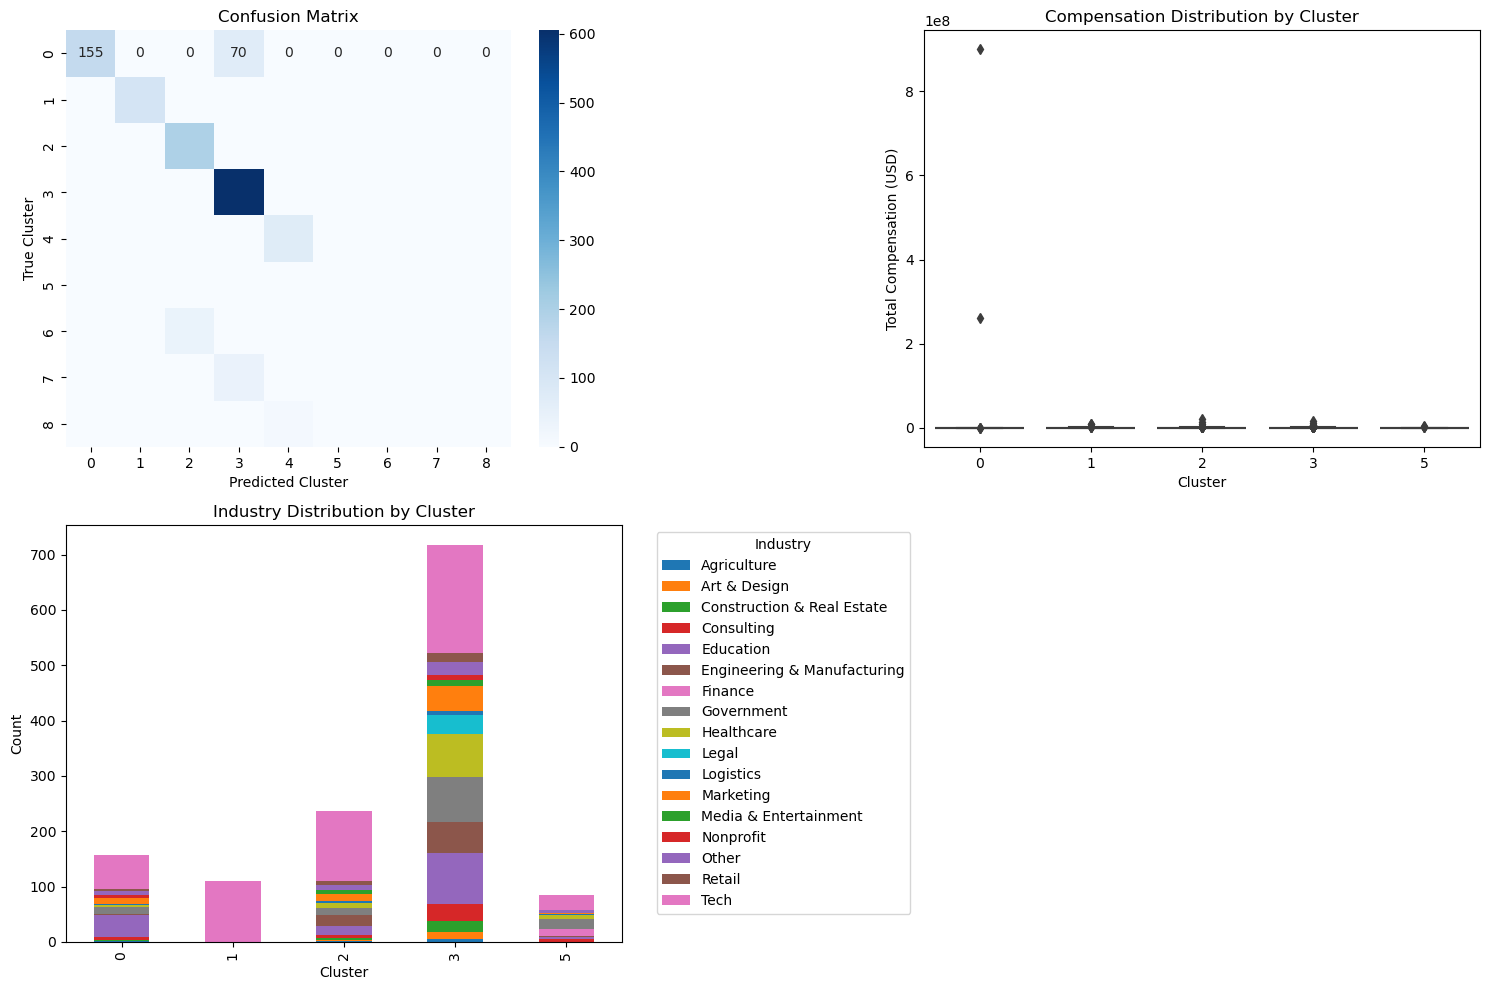


=== DETAILED CLUSTER PROFILES ===

Cluster 0 Profile:
- Size: 157 samples (12.0%)
- Avg Compensation: $7,693,261

Most Common Attributes:
Country: Canada
Industry: Tech
Job Title: Management
Gender Distribution:
Series([], )

Compensation Range:
count    1.570000e+02
mean     7.693261e+06
std      7.463056e+07
min      8.769000e+04
25%      2.035000e+05
50%      2.960000e+05
75%      3.746250e+05
90%      4.699000e+05
max      9.000000e+08

--------------------------------------------------

Cluster 1 Profile:
- Size: 110 samples (8.4%)
- Avg Compensation: $638,849

Most Common Attributes:
Country: United States
Industry: Finance
Job Title: Management
Gender Distribution:
Series([], )

Compensation Range:
count    1.100000e+02
mean     6.388494e+05
std      1.347857e+06
min      2.646000e+02
25%      2.220000e+05
50%      3.706750e+05
75%      5.575000e+05
90%      9.277750e+05
max      1.000000e+07

--------------------------------------------------

Cluster 2 Profile:
- Size: 237 sa

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cluster_results = pd.DataFrame({
    'True_Cluster': test_labels,
    'Predicted_Cluster': test_pred
})

for col in ['Country_cleaned', 'Industry_grouped', 'JobTitle_grouped', 'TotalComp', 'Gender']:
    cluster_results[col] = df_test[col].values

gender_mapping = {0: 'Man', 1: 'Woman', 2: 'Non-binary', 3: 'Other'}
cluster_results['Gender'] = cluster_results['Gender'].map(gender_mapping)

print("\n=== CLUSTER SUMMARY ===")
print("="*50)

cluster_counts = cluster_results['Predicted_Cluster'].value_counts().sort_index()
print("\nCluster Distribution:")
print(cluster_counts)

comp_by_cluster = cluster_results.groupby('Predicted_Cluster')['TotalComp'].agg(['mean', 'median', 'std', 'count'])
print("\nCompensation by Cluster:")
print(comp_by_cluster)

print("\nTop Countries by Cluster:")
print(cluster_results.groupby('Predicted_Cluster')['Country_cleaned'].agg(lambda x: x.value_counts().index[0]))

print("\nTop Industries by Cluster:")
print(cluster_results.groupby('Predicted_Cluster')['Industry_grouped'].agg(lambda x: x.value_counts().index[0]))

print("\nTop Job Titles by Cluster:")
print(cluster_results.groupby('Predicted_Cluster')['JobTitle_grouped'].agg(lambda x: x.value_counts().index[0]))

print("\nGender Distribution by Cluster:")
print(cluster_results.groupby(['Predicted_Cluster', 'Gender']).size().unstack().fillna(0))

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
cm = confusion_matrix(test_labels, test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Cluster')
plt.ylabel('True Cluster')

plt.subplot(2, 2, 2)
sns.boxplot(data=cluster_results, x='Predicted_Cluster', y='TotalComp')
plt.title('Compensation Distribution by Cluster')
plt.ylabel('Total Compensation (USD)')
plt.xlabel('Cluster')

plt.subplot(2, 2, 3)
industry_dist = cluster_results.groupby(['Predicted_Cluster', 'Industry_grouped']).size().unstack()
industry_dist.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Industry Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1))


plt.tight_layout()
plt.show()

print("\n=== DETAILED CLUSTER PROFILES ===")
print("="*50)

for cluster in sorted(cluster_results['Predicted_Cluster'].unique()):
    cluster_data = cluster_results[cluster_results['Predicted_Cluster'] == cluster]
    
    print(f"\nCluster {cluster} Profile:")
    print(f"- Size: {len(cluster_data)} samples ({len(cluster_data)/len(cluster_results)*100:.1f}%)")
    print(f"- Avg Compensation: ${cluster_data['TotalComp'].mean():,.0f}")
    
    # Top characteristics
    print("\nMost Common Attributes:")
    print(f"Country: {cluster_data['Country_cleaned'].mode()[0]}")
    print(f"Industry: {cluster_data['Industry_grouped'].mode()[0]}")
    print(f"Job Title: {cluster_data['JobTitle_grouped'].mode()[0]}")
    print(f"Gender Distribution:")
    print(cluster_data['Gender'].value_counts(normalize=True).to_string())
    
    # Compensation range
    print("\nCompensation Range:")
    print(cluster_data['TotalComp'].describe(percentiles=[0.25, 0.5, 0.75, 0.9]).to_string())
    
    print("\n" + "-"*50)

In [28]:
# Predict cluster labels for training and test sets
train_labels = mod.predict(X_train_scaled)
test_labels = mod.predict(X_test_scaled)

# Add cluster labels to the original dataframes
df_train['Predicted_Cluster'] = train_labels
df_test['Predicted_Cluster'] = test_labels

# Combine train and test data for a complete analysis (optional)
df_combined = pd.concat([df_train, df_test])

In [29]:
average_salary_per_cluster = df_combined.groupby('Predicted_Cluster')['TotalComp'].mean()
print(average_salary_per_cluster)


Predicted_Cluster
0    3.089078e+05
1    5.514361e+05
2    6.764736e+05
3    4.742556e+05
4    2.220026e+10
5    4.717613e+05
6    2.925000e+09
7    5.636388e+06
8    7.084246e+05
9    4.544644e+05
Name: TotalComp, dtype: float64


Saving Model to PKL

In [30]:
import joblib
# Save model and scaler
joblib.dump(clf, "ridge_model.pkl")
joblib.dump(scaler, "scaler.pkl")
# 1. Save the Ordinal Encoder
joblib.dump(encoder, 'ordinal_encoder.pkl')

# 2. Save all Target Encoders
for col, encoder in encoders.items():
    joblib.dump(encoder, f'target_encoder_{col}.pkl')

# 3. Save Gender mapping (as a dictionary)
gender_mapping = {
    'Man': 0,
    'Woman': 1,
    'Non-binary': 2,
    'Other or prefer not to answer': 3
}
joblib.dump(gender_mapping, 'gender_mapping.pkl')
cluster_salary_map = {
    0: 308907.8,
    1: 551436.1,
    2: 676473.6,
    3: 474255.6,
    4: 2.220026e+10,
    5: 471761.3,
    6: 2.925000e+09,
    7: 5636388.0,
    8: 708424.6,
    9: 454464.4,
}
joblib.dump(cluster_salary_map, "cluster_salary_map.pkl")


['cluster_salary_map.pkl']